In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
import warnings
warnings.simplefilter('ignore')

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
col=list(df.columns)

## Visualization of Distribution

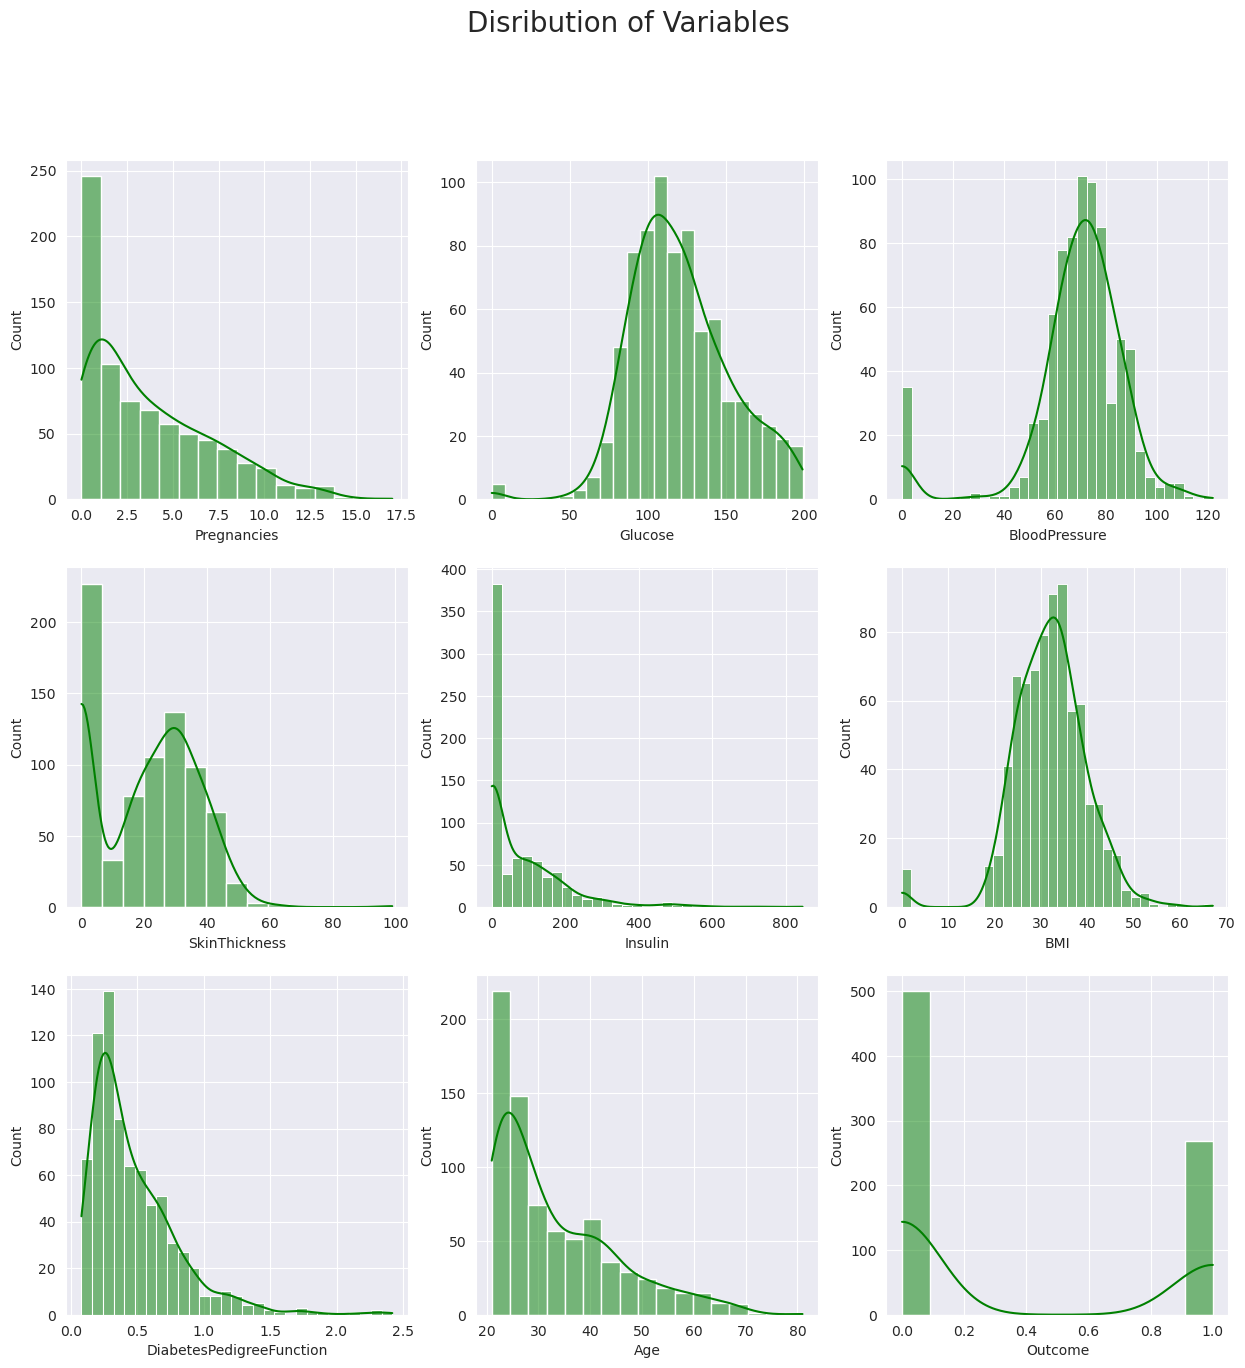

In [10]:
plt.figure(figsize=(15,15))
plt.suptitle("Disribution of Variables",size=20)
for i in range(len(col)):
    plt.subplot(3,3,i+1)
    sns.histplot(df[col[i]],kde=True,color='green')
plt.show()
    

In [11]:
#### From above distribution we can see some abnormality in the datasets,meaning outliers are present
## For eg.Glucose,Blood Pressure,BMI has zero and in real world they cant be zero, Also skin thickness and insulin cant have zero but bove has large count of 0 values 

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

In [12]:
df.isnull().sum()  ## There is not any null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [14]:
## AS there are outliers in the dataset as indicated in Question 1 lets fill this 0 value with appropraite value

In [15]:
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [16]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].median())

In [17]:
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mode()[0])
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())

In [18]:
df['BloodPressure'].mode()[0]

70

In [19]:
df['SkinThickness'].median()

23.0

In [20]:
df['Insulin'].median()

31.25

In [21]:
df['BMI'].median()

32.0

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
## Output is the Outcome variable
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [24]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=2,stratify=y)

In [26]:
x_train.shape

(614, 8)

In [27]:
y_train.shape

(614,)

In [28]:
x_test.shape

(154, 8)

In [29]:
y_test.shape

(154,)

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [31]:
DT=DecisionTreeClassifier()

In [32]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
y_pred=DT.predict(x_test)
print("Accuracy Score: {}\n".format(accuracy_score(y_test,y_pred)))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))
print("\nClassification Report\n",classification_report(y_test,y_pred))

Accuracy Score: 0.6883116883116883

Confusion Matrix 
 [[83 17]
 [31 23]]

Classification Report
               precision    recall  f1-score   support

           0       0.73      0.83      0.78       100
           1       0.57      0.43      0.49        54

    accuracy                           0.69       154
   macro avg       0.65      0.63      0.63       154
weighted avg       0.67      0.69      0.68       154



### Cross Validation and hyperparameter

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [35]:
kfold=KFold(n_splits=10)

In [36]:
cv_score=cross_val_score(estimator=DT,X=x_train,y=y_train,cv=kfold)

In [37]:
cv_score

array([0.75806452, 0.67741935, 0.74193548, 0.64516129, 0.80327869,
       0.6557377 , 0.75409836, 0.75409836, 0.6557377 , 0.72131148])

In [38]:
cv_score.mean()

0.7166842940243258

In [39]:
## Hyperparameter Tuning

In [40]:
parameter={'criterion':('gini', 'entropy', 'log_loss'),
           'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']}
           
           

In [41]:
dt_grid=GridSearchCV(estimator=DT,param_grid=parameter,cv=10,scoring='accuracy',return_train_score='True')

In [42]:
dt_grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             return_train_score='True', scoring='accuracy')

In [43]:
dt_grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [44]:
dt_grid.best_score_

0.7639344262295082

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [48]:
DT=DecisionTreeClassifier(criterion= 'log_loss',
 max_depth=5,
 max_features='auto',
 splitter= 'best')

In [49]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=5, max_features='auto')

In [50]:
y_pred=DT.predict(x_test)
print("Accuracy Score: {}\n".format(accuracy_score(y_test,y_pred)))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))
print("\nClassification Report\n",classification_report(y_test,y_pred))

Accuracy Score: 0.7207792207792207

Confusion Matrix 
 [[84 16]
 [27 27]]

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       100
           1       0.63      0.50      0.56        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



In [51]:
from sklearn.metrics import roc_curve,auc

In [52]:
y_prob=DT.predict_proba(x_test)

In [59]:
fpr,tpr,thresholds=roc_curve(y_test,y_prob[:,1])

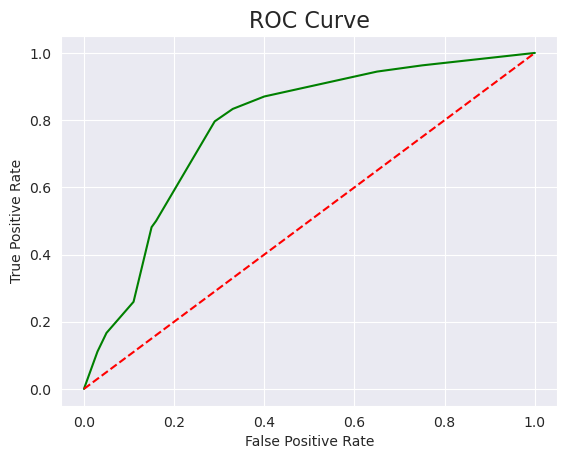

In [81]:
plt.plot(fpr,tpr,color='g')
plt.plot([0,1],[0,1],color='red',linestyle='dashed')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",size=16)
plt.show()

In [89]:
auc(fpr,tpr)

0.7810185185185186

In [91]:
opt=np.sqrt(tpr*(1-fpr))

In [92]:
opt

array([0.        , 0.32829526, 0.39791121, 0.48035481, 0.52634308,
       0.63973374, 0.64807407, 0.75191115, 0.74721706, 0.72264945,
       0.57493961, 0.49065338, 0.        ])

In [93]:
ind=np.argmax(opt)

In [96]:
thresholds[ind]

0.4188034188034188

In [97]:
sample=pd.DataFrame({'Actual':y_test,'Propability':y_prob[:,1]})

In [100]:
sample['new_prediction']=np.where(sample['Propability']>thresholds[ind],1,0)

In [101]:
sample.head()

,Actual,Propability,new_prediction
615,0,0.112069,0
80,0,0.000000,0
148,0,0.418803,0
132,1,0.568182,1
501,0,0.112069,0


In [102]:
print("Accuracy Score: {}\n".format(accuracy_score(y_test,sample['new_prediction'])))
print("Confusion Matrix \n",confusion_matrix(y_test,sample['new_prediction']))
print("\nClassification Report\n",classification_report(y_test,sample['new_prediction']))

Accuracy Score: 0.7207792207792207

Confusion Matrix 
 [[84 16]
 [27 27]]

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       100
           1       0.63      0.50      0.56        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

In [87]:
DT.feature_importances_

array([0.07959973, 0.29122532, 0.0325844 , 0.11045084, 0.09323381,
       0.11903788, 0.06909827, 0.20476974])

In [88]:
DT.feature_names_in_

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [ ]:
## from above Glucose and Age has higher importance in model building

[Text(0.5297619047619048, 0.9166666666666666, 'x[4] <= 123.5\nlog_loss = 0.933\nsamples = 614\nvalue = [400, 214]'),
 Text(0.30357142857142855, 0.75, 'x[7] <= 30.5\nlog_loss = 0.875\nsamples = 451\nvalue = [318, 133]'),
 Text(0.17857142857142858, 0.5833333333333334, 'x[3] <= 34.5\nlog_loss = 0.67\nsamples = 245\nvalue = [202, 43]'),
 Text(0.09523809523809523, 0.4166666666666667, 'x[7] <= 22.5\nlog_loss = 0.593\nsamples = 209\nvalue = [179, 30]'),
 Text(0.047619047619047616, 0.25, 'x[3] <= 22.5\nlog_loss = 0.306\nsamples = 73\nvalue = [69, 4]'),
 Text(0.023809523809523808, 0.08333333333333333, 'log_loss = 0.0\nsamples = 28\nvalue = [28, 0]'),
 Text(0.07142857142857142, 0.08333333333333333, 'log_loss = 0.433\nsamples = 45\nvalue = [41, 4]'),
 Text(0.14285714285714285, 0.25, 'x[1] <= 130.0\nlog_loss = 0.704\nsamples = 136\nvalue = [110, 26]'),
 Text(0.11904761904761904, 0.08333333333333333, 'log_loss = 0.506\nsamples = 116\nvalue = [103, 13]'),
 Text(0.16666666666666666, 0.083333333333333

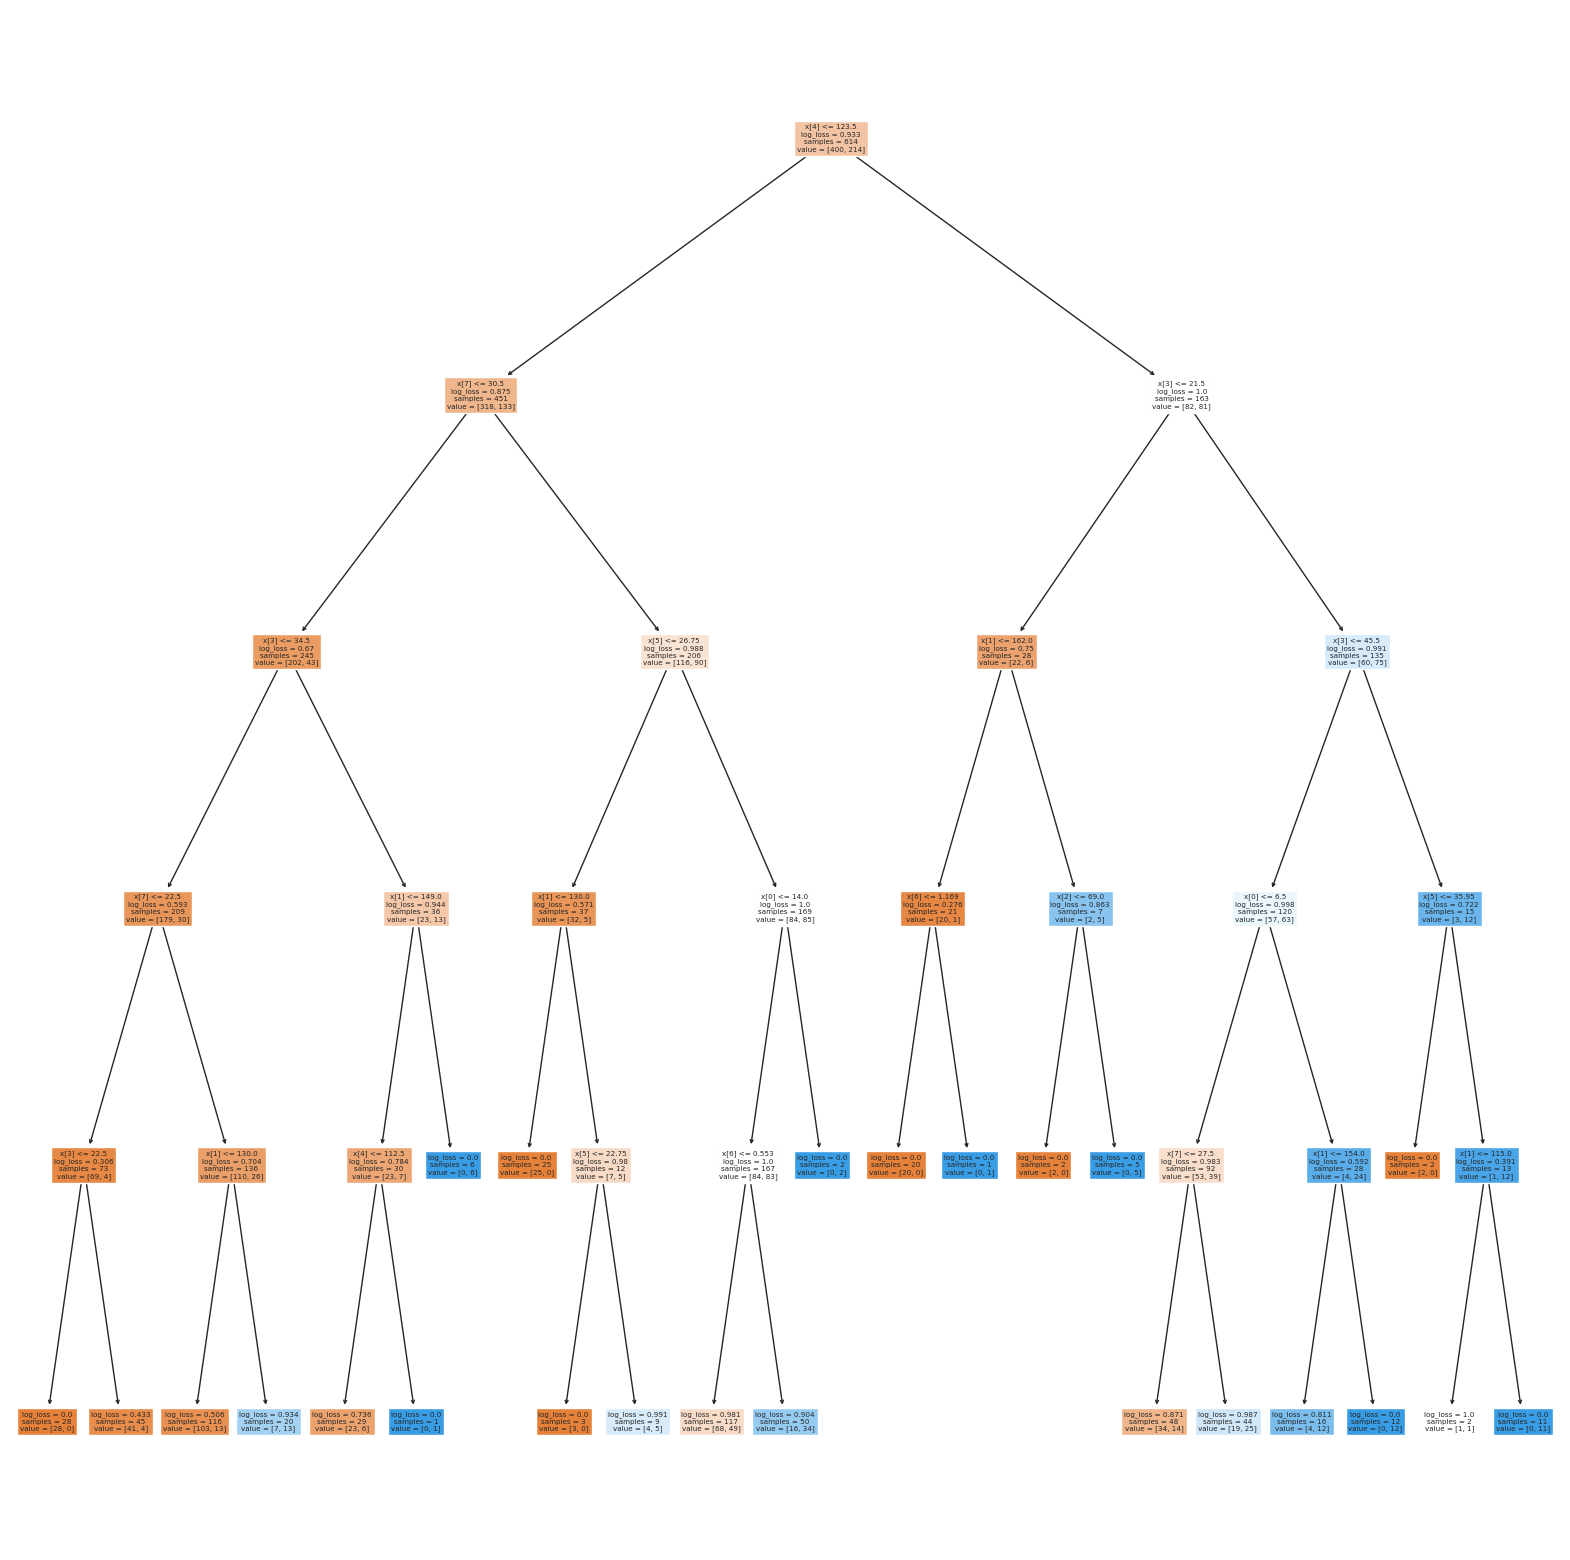

In [108]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(DT,filled=True)

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

In [109]:
## Frm above we have evaluated our model

In [110]:
# Sensitivity is important to discus here as False negative needs to be reduced because if a person havoing  diabetes is predicted to be non diabetic then important
## precuation which needs to be taken will not be there leading to life threatening problems.

In [111]:
## Sensitivity analysis involves testing the model's sensitivity to changes in input variables. For example, we can vary the values of key input variables
## to see how much the model's predictions change. This can help identify which variables have the greatest impact on the model's predictions, and which ones are less important.

In [112]:
# Scenario testing involves testing the model's performance under different scenarios or assumptions. For example, we can test how the model performs when the 
## prevalence of diabetes in the population changes, or when the cost of treatment changes. This can help identify potential risks and uncertainties associated with the model's predictions.